In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from sklearn.metrics import mean_squared_log_error
pd.options.mode.chained_assignment = None 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [54]:
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data  = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [55]:
solution   = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
y_true     = solution["SalePrice"]
features = ['OverallQual']

In [56]:
X_train       = train_data[features]
y_train       = train_data["SalePrice"]
final_X_test  = test_data[features]

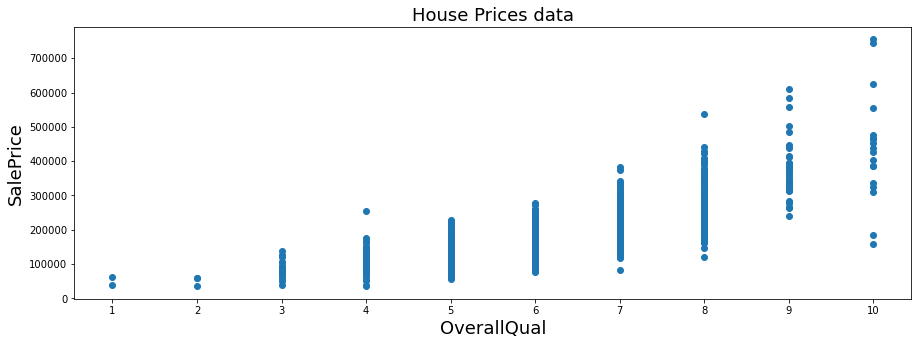

In [57]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(X_train,y_train)
loc = plticker.MultipleLocator(base=1.0)
ax.xaxis.set_major_locator(loc)
ax.set_title ("House Prices data", fontsize=18)
ax.set_xlabel ("OverallQual", fontsize=18)
ax.set_ylabel ("SalePrice", fontsize=18);

In [ ]:
mean_price = y_train.mean()
print("The mean price is", mean_price)
final_X_test.loc[:,'y_pred'] = mean_price
# calculate the score
RMSLE = np.sqrt( mean_squared_log_error(y_true, final_X_test['y_pred']) )
print("The score is %.5f" % RMSLE )
fig, ax = plt.subplots(figsize=(15, 5))
# plot the training data
plt.scatter(X_train,y_train)
# now plot the results of our model
plt.plot(final_X_test['OverallQual'],final_X_test['y_pred'],color='orange',linewidth=3)
ax.set_title ("House Prices data", fontsize=18)
ax.set_xlabel ("OverallQual", fontsize=18)
ax.set_ylabel ("SalePrice", fontsize=18);

In [ ]:
fit = (np.polyfit(X_train['OverallQual'], y_train, 1 ))
c = fit[1]
m = fit[0]
final_X_test.loc[:,'y_pred'] = (m*final_X_test['OverallQual'] + c)
# set any negative prices to be zero:
final_X_test.loc[final_X_test.y_pred < 0, 'y_pred'] = 0
# calculate the score
RMSLE = np.sqrt( mean_squared_log_error(y_true, final_X_test['y_pred']) )
print("The score is %.5f" % RMSLE )
fig, ax = plt.subplots(figsize=(15, 5))
# plot the training data
plt.scatter(X_train,y_train)
# now plot the results of our model
x = np.linspace(0,10,100)
y = m*x + c
plt.plot(x,y,color='orange',linewidth=3)
#plt.scatter(final_X_test['OverallQual'],final_X_test['y_pred'],color='orange',s=75)
ax.set_title ("House Prices data", fontsize=18)
ax.set_xlabel ("OverallQual", fontsize=18)
ax.set_ylabel ("SalePrice", fontsize=18)
ax.set_ylim(ymin=0);

In [ ]:
fit = (np.polyfit(X_train['OverallQual'], y_train, 2 ))
c = fit[2]
b = fit[1]
a = fit[0]
final_X_test.loc[:,'y_pred'] = (a*final_X_test['OverallQual']**2 +b*final_X_test['OverallQual'] + c)
# calculate the score
RMSLE = np.sqrt( mean_squared_log_error(y_true, final_X_test['y_pred']) )
print("The score is %.5f" % RMSLE )
fig, ax = plt.subplots(figsize=(15, 5))
# plot the training data
plt.scatter(X_train,y_train)
# now plot the results of our model
y = a*x**2 + b*x + c
plt.plot(x,y,color='orange',linewidth=3)
#plt.scatter(final_X_test['OverallQual'],final_X_test['y_pred'],color='orange',s=75)
ax.set_title ("House Prices data", fontsize=18)
ax.set_xlabel ("OverallQual", fontsize=18)
ax.set_ylabel ("SalePrice", fontsize=18);

In [ ]:
fit = (np.polyfit(X_train['OverallQual'], np.log(y_train), 1))
A = np.exp(fit[1])
B = fit[0]
final_X_test.loc[:,'y_pred'] = (A*np.exp(B*final_X_test['OverallQual']))
# calculate the score
RMSLE = np.sqrt( mean_squared_log_error(y_true, final_X_test['y_pred']) )
print("The score is %.5f" % RMSLE )
fig, ax = plt.subplots(figsize=(15, 5))
# plot the training data
plt.scatter(X_train,y_train)
# now plot the results of our model
y = A*np.exp(B*x)
plt.plot(x,y,color='orange',linewidth=3)
#plt.scatter(final_X_test['OverallQual'],final_X_test['y_pred'],color='orange',s=75)
ax.set_title ("House Prices data", fontsize=18)
ax.set_xlabel ("OverallQual", fontsize=18)
ax.set_ylabel ("SalePrice", fontsize=18);

In [ ]:
output = pd.DataFrame({"Id":test_data.Id, "SalePrice":final_X_test['y_pred']})
output.to_csv('submission.csv', index=False)